La idea de este proyecto es analizar el comportamiento de los usuarios que realizan compras de alimentos a través de la aplicación WEB destinada para este proposito. Veremos si al incorporar un grupo de prueba a los grupos de control ya existente afecta o no el comportamiento de dichos usuarios, es decir, si aumenta el uso de la aplicación y si esto puede repercutir en el incremento de las compras. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as mth
import datetime as dt
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy import stats

Etapa I

In [5]:
data_meals = pd.read_csv('logs_exp_us.csv', sep='\t')

In [6]:
data_meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
data_meals.head(1)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246


Etapa II

In [8]:
nuevos_nombres = {
    'EventName': 'nombre_del_evento',
    'DeviceIDHash': 'id_usuario_unico',
    'EventTimestamp': 'hora_del_evento',
    'ExpId': 'id_del_experimento'
}

data_meals = data_meals.rename(columns=nuevos_nombres)
data_meals.head(2)

,nombre_del_evento,id_usuario_unico,hora_del_evento,id_del_experimento
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


In [9]:
data_meals['nombre_del_evento'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [10]:
data_meals.shape

(244126, 4)

In [11]:
data_meals['hora_del_evento'] = pd.to_datetime(data_meals['hora_del_evento'])


In [12]:
data_meals["fecha"] = data_meals["hora_del_evento"].values.astype(dtype='datetime64[D]')

data_meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   nombre_del_evento   244126 non-null  object        
 1   id_usuario_unico    244126 non-null  int64         
 2   hora_del_evento     244126 non-null  datetime64[ns]
 3   id_del_experimento  244126 non-null  int64         
 4   fecha               244126 non-null  datetime64[s] 
dtypes: datetime64[ns](1), datetime64[s](1), int64(2), object(1)
memory usage: 9.3+ MB


In [13]:
data_meals.duplicated().value_counts()

False    243713
True        413
Name: count, dtype: int64

Cambié el nombre de las columnas de manera que sean conveniente. No existen valores ausente y hay algunmos valores dupicados pero no es conveniente eliminarlos. Agregué una columna de fecha y hora y una columna separada para las fechas.

Etapa III

In [14]:
event_counts = data_meals['nombre_del_evento'].value_counts()
event_counts

nombre_del_evento
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

In [15]:
total_eventos = event_counts.sum()
print('total de eventos', total_eventos)


total de eventos 244126


In [16]:
id_usuarios_counts = data_meals['id_usuario_unico'].value_counts()
total_id_usuarios = id_usuarios_counts.sum()
print('total id de usuarios', total_id_usuarios)

total id de usuarios 244126


In [17]:
eventos_por_usuario = data_meals.groupby('id_usuario_unico').size()
promedio_eventos_por_usuario = eventos_por_usuario.mean()
print('Promedio de Eventos por Usuario:',promedio_eventos_por_usuario)

Promedio de Eventos por Usuario: 32.33028737915508


In [18]:
fecha_minima = data_meals['hora_del_evento'].min()
fecha_maxima = data_meals['hora_del_evento'].max()

print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")

Fecha mínima: 1970-01-01 00:00:01.564029816
Fecha máxima: 1970-01-01 00:00:01.565212517


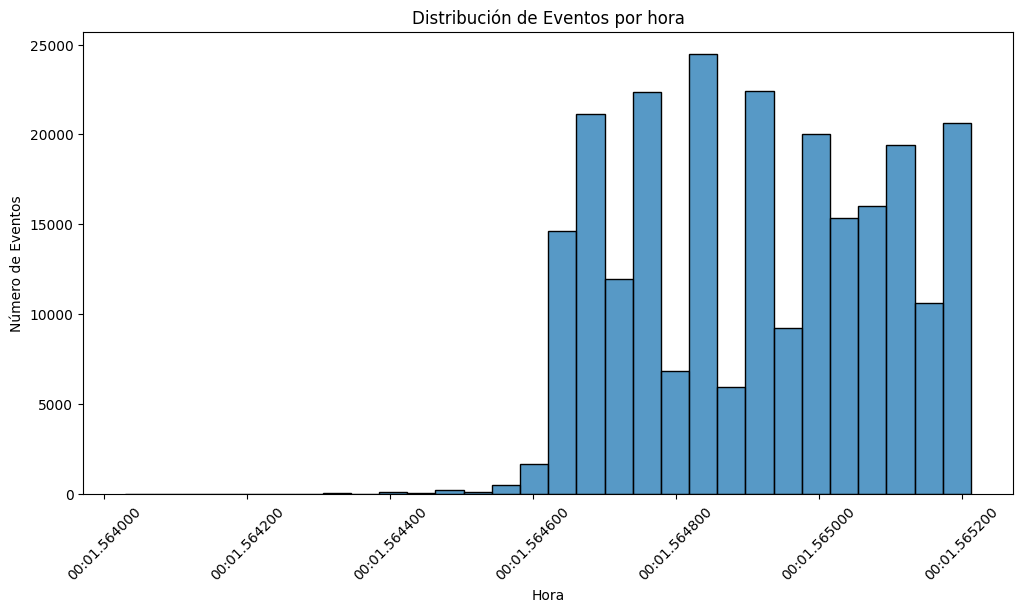

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data_meals['hora_del_evento'], bins=30, kde=False)  
plt.title('Distribución de Eventos por hora')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

In [20]:
punto_corte = pd.Timestamp('1970-01-01 00:00:01.564600')
data_filtrada = data_meals[data_meals['hora_del_evento'] > punto_corte]
fecha_minima_filtrada = data_filtrada['hora_del_evento'].min()
fecha_maxima_filtrada = data_filtrada['hora_del_evento'].max()

print(f"Fecha mínima filtrada: {fecha_minima_filtrada}")
print(f"Fecha máxima filtrada: {fecha_maxima_filtrada}")

Fecha mínima filtrada: 1970-01-01 00:00:01.564600019
Fecha máxima filtrada: 1970-01-01 00:00:01.565212517


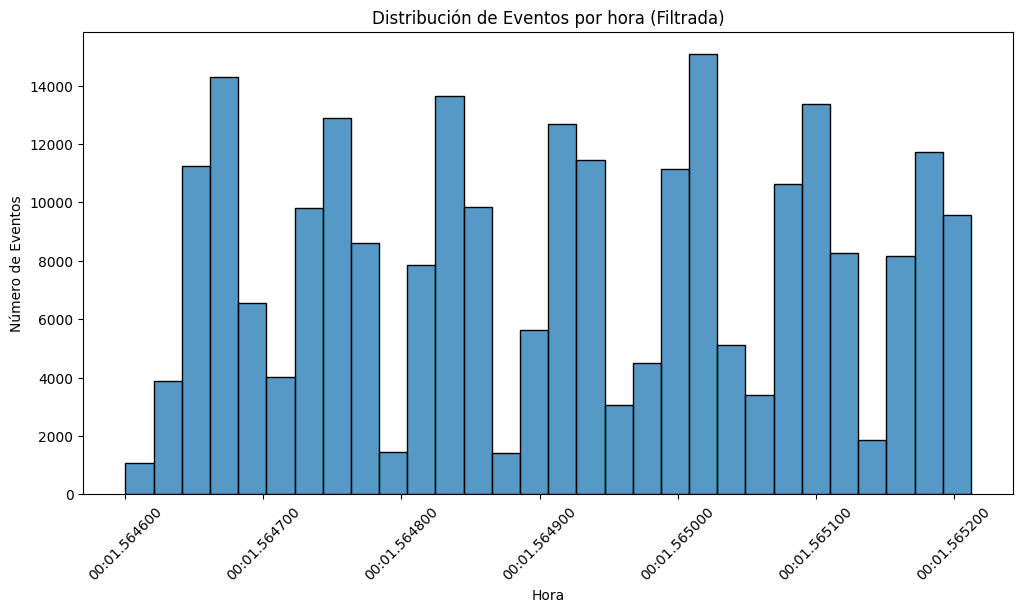

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data_filtrada['hora_del_evento'], bins=30, kde=False)
plt.title('Distribución de Eventos por hora (Filtrada)')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

In [22]:
total_eventos_inicial = data_meals.shape[0]
total_usuarios_inicial = data_meals['id_usuario_unico'].nunique()

print(f"Total de eventos antes del filtro: {total_eventos_inicial}")
print(f"Total de usuarios antes del filtro: {total_usuarios_inicial}")

Total de eventos antes del filtro: 244126
Total de usuarios antes del filtro: 7551


In [23]:
total_eventos_filtrado = data_filtrada.shape[0]
total_usuarios_filtrado = data_filtrada['id_usuario_unico'].nunique()

print(f"Total de eventos después del filtro: {total_eventos_filtrado}")
print(f"Total de usuarios después del filtro: {total_usuarios_filtrado}")

Total de eventos después del filtro: 242251
Total de usuarios después del filtro: 7539


In [24]:
pérdida_eventos = total_eventos_inicial - total_eventos_filtrado
pérdida_usuarios = total_usuarios_inicial - total_usuarios_filtrado

print(f"Pérdida de eventos: {pérdida_eventos}")
print(f"Pérdida de usuarios: {pérdida_usuarios}")


porcentaje_pérdida_eventos = (pérdida_eventos / total_eventos_inicial) * 100
porcentaje_pérdida_usuarios = (pérdida_usuarios / total_usuarios_inicial) * 100

print(f"Porcentaje de pérdida de eventos: {porcentaje_pérdida_eventos:.2f}%")
print(f"Porcentaje de pérdida de usuarios: {porcentaje_pérdida_usuarios:.2f}%")


Pérdida de eventos: 1875
Pérdida de usuarios: 12
Porcentaje de pérdida de eventos: 0.77%
Porcentaje de pérdida de usuarios: 0.16%


In [25]:
grupos_experimentales = data_filtrada['id_del_experimento'].unique()
print(f"Grupos experimentales disponibles: {grupos_experimentales}")

Grupos experimentales disponibles: [247 248 246]


In [26]:
usuarios_por_grupo = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()

print("Número de usuarios por grupo experimental:")
print(usuarios_por_grupo)

grupos_sin_usuarios = usuarios_por_grupo[usuarios_por_grupo == 0].index
if grupos_sin_usuarios.empty:
    print("Todos los grupos experimentales tienen usuarios.")
else:
    print(f"Grupos experimentales sin usuarios: {grupos_sin_usuarios.tolist()}")

Número de usuarios por grupo experimental:
id_del_experimento
246    2484
247    2517
248    2538
Name: id_usuario_unico, dtype: int64
Todos los grupos experimentales tienen usuarios.


Se pudo calcular cuántos eventos hay en los registros, cuántos usuarios hay en los registros, cuál es el promedio de eventos por usuario.
Igualmente obtuvimos el periodo de tiempo que cubren los datos y las fechas máxima y mínima. Grafiqué un histograma por fecha y hora.
Realicé un filtro en las fechas/horas.
La perdida de usuarios y eventos fueron:
Porcentaje de pérdida de eventos: 0.77%
Porcentaje de pérdida de usuarios: 0.16%

Si existen usuarios de los tres grupos experimentales.

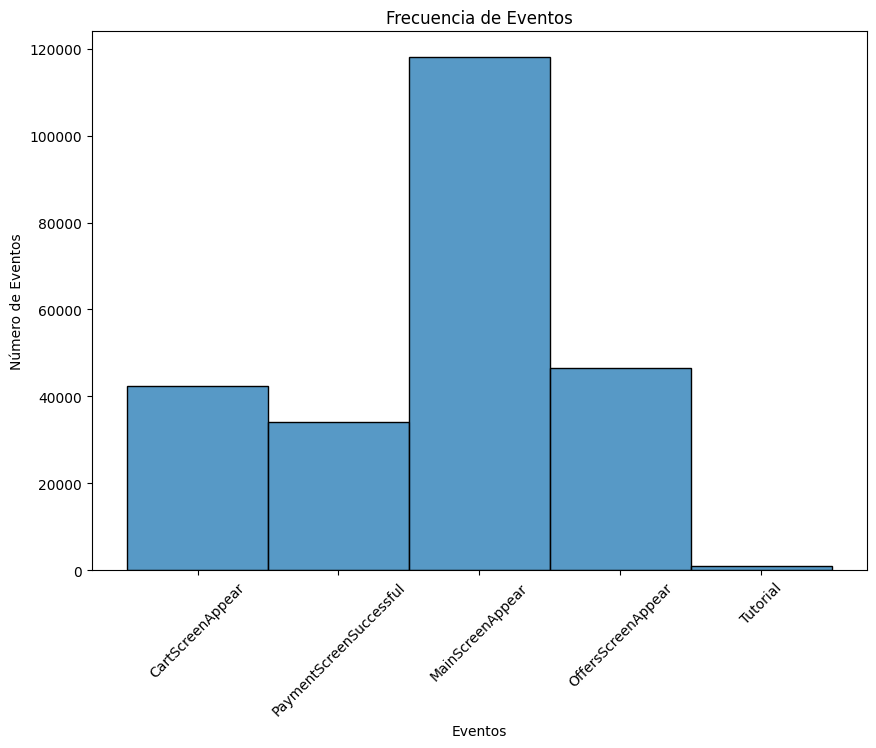

In [27]:
plt.figure(figsize=(10, 7))
sns.histplot(data_filtrada['nombre_del_evento'], bins=10, kde=False)
plt.title('Frecuencia de Eventos')
plt.xlabel('Eventos')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

Etapa IV

In [28]:
data_filtrada.head(2)

,nombre_del_evento,id_usuario_unico,hora_del_evento,id_del_experimento,fecha
1875,CartScreenAppear,6100683422866094409,1970-01-01 00:00:01.564600019,247,1970-01-01
1876,PaymentScreenSuccessful,6100683422866094409,1970-01-01 00:00:01.564600019,247,1970-01-01


In [29]:
frecuencias = data_filtrada['nombre_del_evento'].value_counts()

print('Frecuencias de sucesos')
print('______________________')
print(frecuencias)

Frecuencias de sucesos
______________________
nombre_del_evento
MainScreenAppear           118054
OffersScreenAppear          46575
CartScreenAppear            42423
PaymentScreenSuccessful     34155
Tutorial                     1044
Name: count, dtype: int64


In [30]:
total_usuarios = data_filtrada['id_usuario_unico'].nunique()

usuarios_con_acciones = data_filtrada['id_usuario_unico'].unique()
proporcion_usuarios_con_acciones = len(usuarios_con_acciones) / total_usuarios

print("\nProporción de usuarios que realizaron al menos una acción:")
print(proporcion_usuarios_con_acciones)


Proporción de usuarios que realizaron al menos una acción:
1.0


In [31]:
users_by_event = data_filtrada.groupby("nombre_del_evento")["id_usuario_unico"].nunique().sort_values(ascending=False).reset_index()
users_by_event["usuario_en_etapa_previa"] = users_by_event["id_usuario_unico"].shift(1)
users_by_event["conversion_etapa_previa"] = users_by_event["id_usuario_unico"] / \
    users_by_event["usuario_en_etapa_previa"]
users_by_event["dropoff_rate"] = 1 - users_by_event["conversion_etapa_previa"]

users_by_event.head()

,nombre_del_evento,id_usuario_unico,usuario_en_etapa_previa,conversion_etapa_previa,dropoff_rate
0,MainScreenAppear,7424,NaN,NaN,NaN
1,OffersScreenAppear,4599,7424.0,0.619477,0.380523
2,CartScreenAppear,3736,4599.0,0.812351,0.187649
3,PaymentScreenSuccessful,3540,3736.0,0.947537,0.052463
4,Tutorial,843,3540.0,0.238136,0.761864


In [32]:
total_primera_etapa = users_by_event["id_usuario_unico"].iloc[0]

total_ultima_etapa = users_by_event["id_usuario_unico"].iloc[-1]

proporcion = total_ultima_etapa / total_primera_etapa

print(f"Proporción de usuarios desde la primera hasta la última etapa: {proporcion:.2%}")

Proporción de usuarios desde la primera hasta la última etapa: 11.36%


Etapa V

In [33]:
print('Cantidad de usuarios que hay en cada grupo')

data_filtrada.groupby("id_del_experimento")["id_usuario_unico"].nunique()

Cantidad de usuarios que hay en cada grupo


id_del_experimento
246    2484
247    2517
248    2538
Name: id_usuario_unico, dtype: int64

In [34]:
muestra_246 = data_filtrada[data_filtrada['id_del_experimento'] == 246]['id_usuario_unico']
muestra_247 = data_filtrada[data_filtrada['id_del_experimento'] == 247]['id_usuario_unico']

t_stat, p_value = stats.ttest_ind(muestra_246, muestra_247)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa.")

Estadístico t: -10.408378885402266
Valor p: 2.3141101249613826e-25
Hay una diferencia estadísticamente significativa.


In [35]:
data_filtrada.head(2)

,nombre_del_evento,id_usuario_unico,hora_del_evento,id_del_experimento,fecha
1875,CartScreenAppear,6100683422866094409,1970-01-01 00:00:01.564600019,247,1970-01-01
1876,PaymentScreenSuccessful,6100683422866094409,1970-01-01 00:00:01.564600019,247,1970-01-01


In [36]:
conteo = data_filtrada.pivot_table(index='nombre_del_evento', 
                                   columns='id_del_experimento', 
                                   aggfunc='size', 
                                   fill_value=0).reset_index()

conteo.columns.name = None  
conteo = conteo.rename(columns={246: 'conteo_246', 247: 'conteo_247', 248: 'conteo_248'})

print(conteo)

         nombre_del_evento  conteo_246  conteo_247  conteo_248
0         CartScreenAppear       14724       12467       15232
1         MainScreenAppear       37907       39346       40801
2       OffersScreenAppear       14839       15253       16483
3  PaymentScreenSuccessful       11920       10048       12187
4                 Tutorial         323         345         376


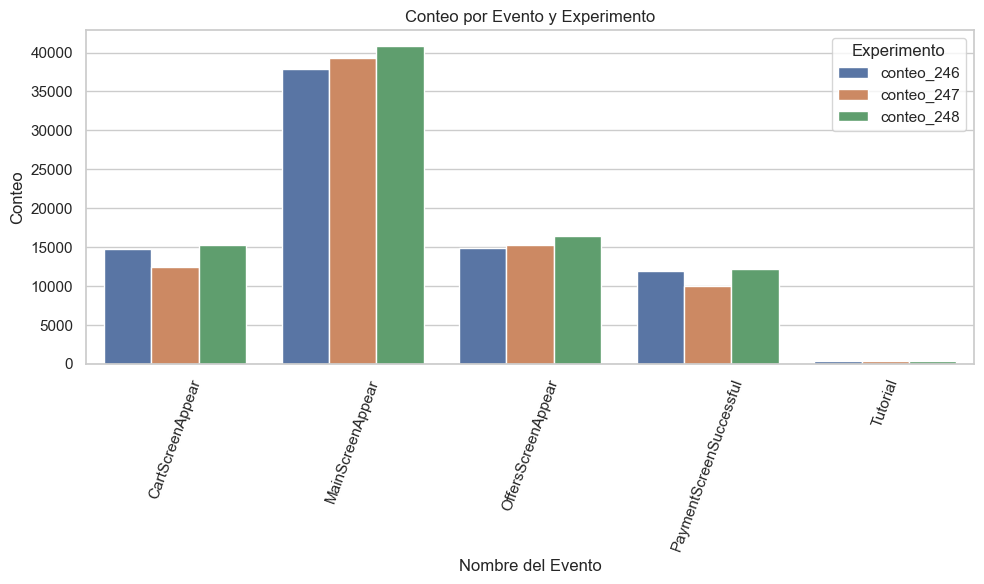

In [37]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

conteo_long = conteo.melt(id_vars='nombre_del_evento', 
                          value_vars=['conteo_246', 'conteo_247', 'conteo_248'],
                          var_name='Experimento', 
                          value_name='Conteo')

sns.barplot(data=conteo_long, x='nombre_del_evento', y='Conteo', hue='Experimento')

plt.xticks(rotation=70)
plt.xlabel('Nombre del Evento')
plt.ylabel('Conteo')
plt.title('Conteo por Evento y Experimento')
plt.legend(title='Experimento')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [38]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'MainScreenAppear']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
usuarios_filtrado = usuarios_evento[usuarios_evento.index.isin([246, 247])]

total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
total_filtrado = total_usuarios[total_usuarios.index.isin([246,247])]

proporcion_evento = usuarios_filtrado/total_filtrado

print("Cantidad de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de control:\n", usuarios_filtrado)
print("Proporción de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de control:\n", proporcion_evento)

Cantidad de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de control:
 id_del_experimento
246    2450
247    2479
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de control:
 id_del_experimento
246    0.986312
247    0.984903
Name: id_usuario_unico, dtype: float64


In [39]:
eventos = ['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

resultados = {}

for evento in eventos:
    df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == evento]
    
    usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    usuarios_filtrados = usuarios_evento[usuarios_evento.index.isin([246, 247])]

    total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    total_filtrado = total_usuarios[total_usuarios.index.isin([246,247])]

    proporcion_eventos = usuarios_filtrados/total_filtrado

    resultados[evento] = {
        'usuarios_filtrados' : usuarios_filtrados,
        'proporcion_eventos': proporcion_eventos
    }

for evento, resultado in resultados.items():
    print(f"Evento: {evento}")
    print("Cantidad de usuarios que realizaron el evento en cada grupo de control:\n", resultado['usuarios_filtrados'])
    print("Proporción de usuarios que realizaron el evento en cada grupo de control:\n", resultado['proporcion_eventos'])
    print()   

Evento: OffersScreenAppear
Cantidad de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    1542
247    1525
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    0.620773
247    0.605880
Name: id_usuario_unico, dtype: float64

Evento: CartScreenAppear
Cantidad de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    1266
247    1239
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    0.509662
247    0.492253
Name: id_usuario_unico, dtype: float64

Evento: PaymentScreenSuccessful
Cantidad de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    1200
247    1158
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en cada grupo de control:
 id_del_experimento
246    0.483092
247    0.460072

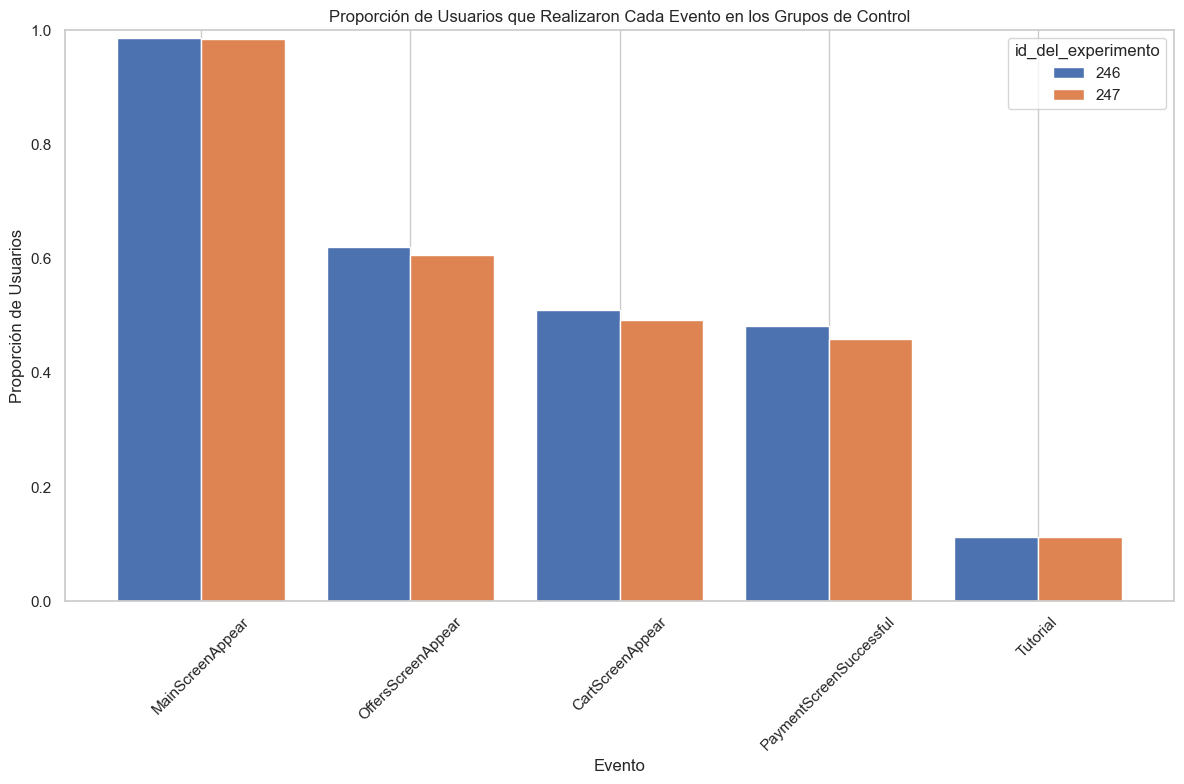

In [40]:
eventos = ['MainScreenAppear','OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

resultados = {}

for evento in eventos:
    df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == evento]
    
    usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    usuarios_filtrados = usuarios_evento[usuarios_evento.index.isin([246, 247])]

    total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    total_filtrado = total_usuarios[total_usuarios.index.isin([246,247])]

    proporcion_eventos = usuarios_filtrados/total_filtrado

    resultados[evento] = proporcion_eventos

df_proporcion = pd.DataFrame(resultados).T
df_proporcion.index.name = 'Evento'

fig, ax = plt.subplots(figsize=(12, 8))
df_proporcion.plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('Evento')
ax.set_ylabel('Proporción de Usuarios')
ax.set_title('Proporción de Usuarios que Realizaron Cada Evento en los Grupos de Control')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [41]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'MainScreenAppear']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
usuarios_filtrado = usuarios_evento[usuarios_evento.index.isin([248])]

total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
total_filtrado = total_usuarios[total_usuarios.index.isin([248])]

proporcion_evento = usuarios_filtrado/total_filtrado

print("Cantidad de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de prueba:\n", usuarios_filtrado)
print("Proporción de usuarios que realizaron el evento 'MainScreenAppear' en el grupo de prueba:\n", proporcion_evento)

Cantidad de usuarios que realizaron el evento 'MainScreenAppear' en cada grupo de prueba:
 id_del_experimento
248    2495
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento 'MainScreenAppear' en el grupo de prueba:
 id_del_experimento
248    0.983058
Name: id_usuario_unico, dtype: float64


In [42]:
eventos = ['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

resultados = {}

for evento in eventos:
    df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == evento]
    
    usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    usuarios_filtrados = usuarios_evento[usuarios_evento.index.isin([248])]

    total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    total_filtrado = total_usuarios[total_usuarios.index.isin([248])]

    proporcion_eventos = usuarios_filtrados/total_filtrado

    resultados[evento] = {
        'usuarios_filtrados' : usuarios_filtrados,
        'proporcion_eventos': proporcion_eventos
    }

for evento, resultado in resultados.items():
    print(f"Evento: {evento}")
    print("Cantidad de usuarios que realizaron el evento en el grupo de prueba:\n", resultado['usuarios_filtrados'])
    print("Proporción de usuarios que realizaron el evento en el grupo de prueba:\n", resultado['proporcion_eventos'])
    print()

Evento: OffersScreenAppear
Cantidad de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    1532
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    0.603625
Name: id_usuario_unico, dtype: float64

Evento: CartScreenAppear
Cantidad de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    1231
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    0.485028
Name: id_usuario_unico, dtype: float64

Evento: PaymentScreenSuccessful
Cantidad de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    1182
Name: id_usuario_unico, dtype: int64
Proporción de usuarios que realizaron el evento en el grupo de prueba:
 id_del_experimento
248    0.465721
Name: id_usuario_unico, dtype: float64

Evento: Tutorial
Cantidad de usuarios que realizaron el event

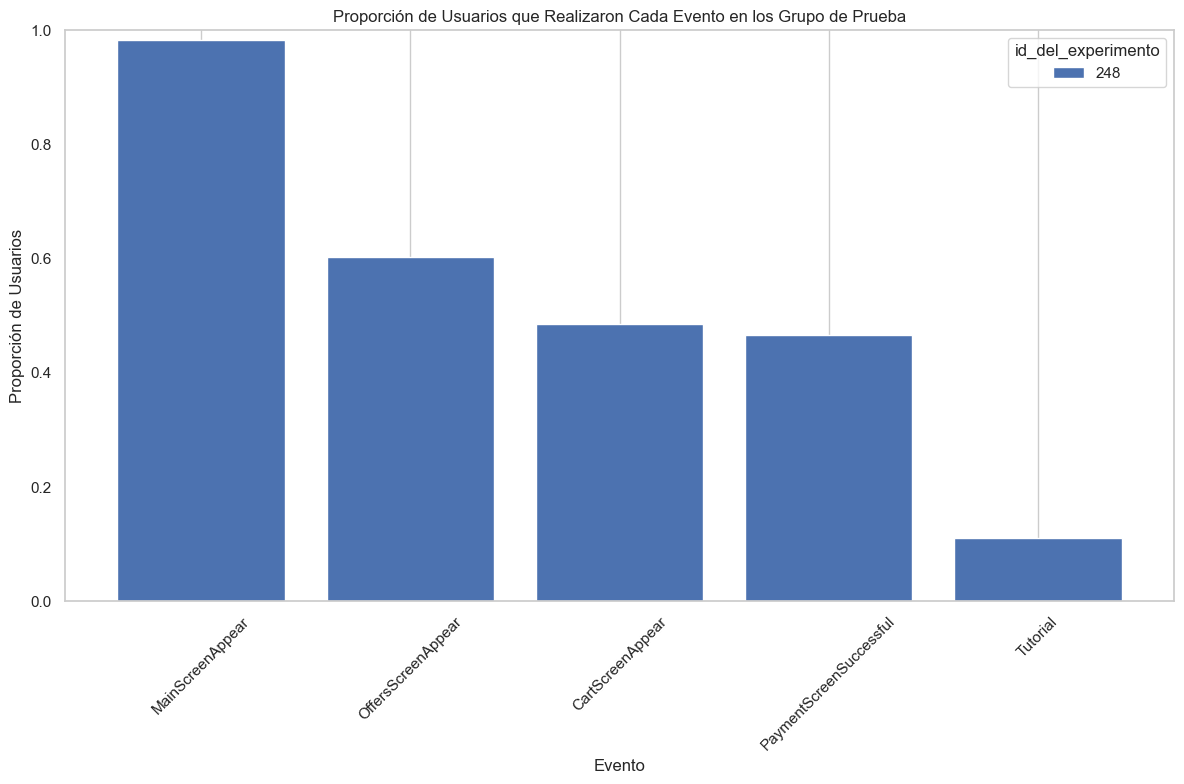

In [43]:
eventos = ['MainScreenAppear','OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
# diccionario para almacenar los resultados
resultados = {}
# Itera sobre cada evento
for evento in eventos:
    # Filtra el dataframe para obtener solo el evento actual
    df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == evento]
    
    # Cuenta la cantidad de usuarios únicos en cada grupo de control que realizaron este evento
    usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    usuarios_filtrados = usuarios_evento[usuarios_evento.index.isin([248])]

    # Cuenta el total de usuarios únicos en cada grupo de control
    total_usuarios = data_filtrada.groupby('id_del_experimento')['id_usuario_unico'].nunique()
    total_filtrado = total_usuarios[total_usuarios.index.isin([248])]

    # Calcula la proporción de usuarios que realizaron el evento
    proporcion_eventos = usuarios_filtrados/total_filtrado

    #Almacena los resultados en el diccionario
    resultados[evento] = proporcion_eventos

# Convertir el diccionario a un DataFrame para graficar
df_proporcion = pd.DataFrame(resultados).T
df_proporcion.index.name = 'Evento'

# Graficar la proporción de usuarios
fig, ax = plt.subplots(figsize=(12, 8))
df_proporcion.plot(kind='bar', ax=ax, width=0.8)

# Configuración del gráfico
ax.set_xlabel('Evento')
ax.set_ylabel('Proporción de Usuarios')
ax.set_title('Proporción de Usuarios que Realizaron Cada Evento en los Grupo de Prueba')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [44]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'MainScreenAppear']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = usuarios_evento.get(246, 0)
grupo_control_247 = usuarios_evento.get(247, 0)
grupo_prueba_248 = usuarios_evento.get(248, 0)

print('Nombre del evento MainScreenAppear')

print(f"Conteo únicos en el grupo de control 246: {grupo_control_246}")
print(f"Conteo únicos en el grupo de control 247: {grupo_control_247}")
print(f"Conteo únicos en el grupo de prueba 248: {grupo_prueba_248}")

grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Realizar pruebas t independientes entre el grupo de prueba y los grupos de control
t_stat_246, p_val_246 = stats.ttest_ind(grupo_prueba_248, grupo_control_246)
t_stat_247, p_val_247 = stats.ttest_ind(grupo_prueba_248, grupo_control_247)

print(f"Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = {t_stat_246}, p-value = {p_val_246}")
print(f"Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = {t_stat_247}, p-value = {p_val_247}")

Nombre del evento MainScreenAppear
Conteo únicos en el grupo de control 246: 2450
Conteo únicos en el grupo de control 247: 2479
Conteo únicos en el grupo de prueba 248: 2495
Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = -0.13233294531630252, p-value = 0.8947263361291913
Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = 0.14632684994200312, p-value = 0.8836693029550431


In [45]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'OffersScreenAppear']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = usuarios_evento.get(246, 0)
grupo_control_247 = usuarios_evento.get(247, 0)
grupo_prueba_248 = usuarios_evento.get(248, 0)

print('Nombre del evento OffersScreenAppear')

print(f"Conteo únicos en el grupo de control 246: {grupo_control_246}")
print(f"Conteo únicos en el grupo de control 247: {grupo_control_247}")
print(f"Conteo únicos en el grupo de prueba 248: {grupo_prueba_248}")

grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Realizar pruebas t independientes entre el grupo de prueba y los grupos de control
t_stat_246, p_val_246 = stats.ttest_ind(grupo_prueba_248, grupo_control_246)
t_stat_247, p_val_247 = stats.ttest_ind(grupo_prueba_248, grupo_control_247)

print(f"Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = {t_stat_246}, p-value = {p_val_246}")
print(f"Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = {t_stat_247}, p-value = {p_val_247}")

Nombre del evento OffersScreenAppear
Conteo únicos en el grupo de control 246: 1542
Conteo únicos en el grupo de control 247: 1525
Conteo únicos en el grupo de prueba 248: 1532
Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = -0.5255840073090677, p-value = 0.5992152046293437
Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = 0.4887775768852076, p-value = 0.6250342593453764


In [46]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'CartScreenAppear']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = usuarios_evento.get(246, 0)
grupo_control_247 = usuarios_evento.get(247, 0)
grupo_prueba_248 = usuarios_evento.get(248, 0)

print('Nombre del evento CartScreenAppear')

print(f"Conteo únicos en el grupo de control 246: {grupo_control_246}")
print(f"Conteo únicos en el grupo de control 247: {grupo_control_247}")
print(f"Conteo únicos en el grupo de prueba 248: {grupo_prueba_248}")

grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Realizar pruebas t independientes entre el grupo de prueba y los grupos de control
t_stat_246, p_val_246 = stats.ttest_ind(grupo_prueba_248, grupo_control_246)
t_stat_247, p_val_247 = stats.ttest_ind(grupo_prueba_248, grupo_control_247)

print(f"Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = {t_stat_246}, p-value = {p_val_246}")
print(f"Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = {t_stat_247}, p-value = {p_val_247}")

Nombre del evento CartScreenAppear
Conteo únicos en el grupo de control 246: 1266
Conteo únicos en el grupo de control 247: 1239
Conteo únicos en el grupo de prueba 248: 1231
Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = 0.4946603401112145, p-value = 0.6208834541658795
Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = 0.6941230111967853, p-value = 0.48767039792706


In [47]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'PaymentScreenSuccessful']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = usuarios_evento.get(246, 0)
grupo_control_247 = usuarios_evento.get(247, 0)
grupo_prueba_248 = usuarios_evento.get(248, 0)

print('Nombre del evento PaymentScreenSuccessful')

print(f"Conteo únicos en el grupo de control 246: {grupo_control_246}")
print(f"Conteo únicos en el grupo de control 247: {grupo_control_247}")
print(f"Conteo únicos en el grupo de prueba 248: {grupo_prueba_248}")

grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Realizar pruebas t independientes entre el grupo de prueba y los grupos de control
t_stat_246, p_val_246 = stats.ttest_ind(grupo_prueba_248, grupo_control_246)
t_stat_247, p_val_247 = stats.ttest_ind(grupo_prueba_248, grupo_control_247)

print(f"Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = {t_stat_246}, p-value = {p_val_246}")
print(f"Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = {t_stat_247}, p-value = {p_val_247}")

Nombre del evento PaymentScreenSuccessful
Conteo únicos en el grupo de control 246: 1200
Conteo únicos en el grupo de control 247: 1158
Conteo únicos en el grupo de prueba 248: 1182
Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = 0.0639993706247359, p-value = 0.9489761024959684
Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = 0.6041719367654523, p-value = 0.5457879558751282


In [48]:
df_evento = data_filtrada[data_filtrada['nombre_del_evento'] == 'Tutorial']

usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = usuarios_evento.get(246, 0)
grupo_control_247 = usuarios_evento.get(247, 0)
grupo_prueba_248 = usuarios_evento.get(248, 0)

print('Nombre del evento Tutorial')

print(f"Conteo únicos en el grupo de control 246: {grupo_control_246}")
print(f"Conteo únicos en el grupo de control 247: {grupo_control_247}")
print(f"Conteo únicos en el grupo de prueba 248: {grupo_prueba_248}")

grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Realizar pruebas t independientes entre el grupo de prueba y los grupos de control
t_stat_246, p_val_246 = stats.ttest_ind(grupo_prueba_248, grupo_control_246)
t_stat_247, p_val_247 = stats.ttest_ind(grupo_prueba_248, grupo_control_247)

print(f"Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = {t_stat_246}, p-value = {p_val_246}")
print(f"Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = {t_stat_247}, p-value = {p_val_247}")

Nombre del evento Tutorial
Conteo únicos en el grupo de control 246: 278
Conteo únicos en el grupo de control 247: 284
Conteo únicos en el grupo de prueba 248: 281
Comparación entre grupo de prueba 248 y grupo de control 246: t-statistic = 0.8834628726579986, p-value = 0.37736738216802834
Comparación entre grupo de prueba 248 y grupo de control 247: t-statistic = 0.08501174751406539, p-value = 0.9322822725428401


In [49]:
usuarios_evento = df_evento.groupby('id_del_experimento')['id_usuario_unico'].nunique()

# Extraer datos para cada grupo
grupo_control_246 = df_evento[df_evento['id_del_experimento'] == 246]['id_usuario_unico'].unique()
grupo_control_247 = df_evento[df_evento['id_del_experimento'] == 247]['id_usuario_unico'].unique()
grupo_prueba_248 = df_evento[df_evento['id_del_experimento'] == 248]['id_usuario_unico'].unique()

# Combinar los grupos de control
grupo_control_combined = pd.concat([
    pd.Series(grupo_control_246),
    pd.Series(grupo_control_247)
]).unique()

# Convertimos las listas de usuarios únicos en conteos
conteo_prueba_248 = len(grupo_prueba_248)
conteo_control_combined = len(grupo_control_combined)

t_stat, p_val = stats.ttest_ind(grupo_prueba_248, grupo_control_combined)

# En este caso, vamos a comparar simplemente los conteos de usuarios únicos
print(f"Conteo únicos en el grupo de prueba 248: {conteo_prueba_248}")
print(f"Conteo únicos combinados en los grupos de control 246 y 247: {conteo_control_combined}")

print(f"Comparación entre grupo de prueba 248 y grupo combinado de control: t-statistic = {t_stat}, p-value = {p_val}")

Conteo únicos en el grupo de prueba 248: 281
Conteo únicos combinados en los grupos de control 246 y 247: 562
Comparación entre grupo de prueba 248 y grupo combinado de control: t-statistic = 0.560285018833267, p-value = 0.575434258545572


Resultados
Conteo únicos en el grupo de prueba 248: 281
Conteo únicos combinados en los grupos de control 246 y 247: 562
Prueba t:
t-statistic: 0.560
p-value: 0.575

Interpretación
Conteos Únicos:
El grupo de prueba 248 tiene 281 usuarios únicos.
Los grupos de control combinados (246 y 247) tienen un total de 562 usuarios únicos.
Prueba t:

La t-statistic de 0.560 indica la diferencia entre las medias de los dos grupos en unidades de desviación estándar. Un valor cercano a 0 sugiere que las medias de los dos grupos son bastante similares.
El p-value de 0.575 es alto, lo que significa que no hay suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no se observa una diferencia estadísticamente significativa entre el grupo de prueba 248 y el grupo combinado de control.

¿Qué significa esto?
p-value: El valor p es una medida de la probabilidad de obtener resultados tan extremos como los observados, dado que la hipótesis nula es cierta. 

En general:
Un p-value menor a 0.05 (o el nivel de significancia que hayas establecido) sugiere que la diferencia entre los grupos es estadísticamente significativa.

Un p-value mayor a 0.05 indica que no hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.

En nuestro caso, con un p-value de 0.575, no se puede concluir que haya una diferencia significativa entre el número de usuarios únicos en el grupo de prueba 248 y el grupo combinado de control. Esto sugiere que, basándonos en los datos y la prueba realizada, el grupo de prueba 248 no difiere significativamente del grupo de control combinado en términos de usuarios únicos.

En vista que no hay una diferencia estadsticamente significativa en los grupos analizados podemos concluir que no es necesartio realizar ningún cambio en nuestras páginas que capturan los datos de los clientes y que los grupos de control analizados al no tener diferencias con respecto al grupo de prueba, las fuentes utilizadas mantienen la misma eficiencia que si realizaramos algún cambio.   